# **CREDIT CARD FRAUD DETECTION**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [57]:
#reading the dataset
credit = pd.read_csv("/content/creditcard.csv")

In [10]:
credit


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27814,34711,1.443955,-1.052462,-0.141721,-1.564017,-0.966274,-0.333886,-0.777060,0.023616,-2.168826,...,-0.479940,-1.165220,0.155226,-0.409701,0.179672,-0.446258,0.004329,0.000060,32.39,0.0
27815,34711,-0.263364,0.931818,1.193111,-0.507924,0.862019,0.249381,0.815449,-0.090801,-0.520583,...,-0.310112,-0.648621,-0.253746,-1.030111,-0.046091,0.107328,0.101296,-0.124600,1.49,0.0
27816,34712,0.976345,-1.024867,0.978714,0.639442,-1.413711,0.311635,-0.909035,0.232423,-0.493025,...,-0.279978,-0.599463,-0.081403,-0.059427,0.202311,-0.405753,0.055109,0.052975,151.00,0.0
27817,34712,1.464604,-0.437919,-0.018869,-1.057177,-0.154243,0.251215,-0.584866,-0.025483,-0.841369,...,-0.148384,-0.454571,-0.019732,-1.313689,0.379650,-0.368497,0.031746,0.007238,8.00,0.0


**ANALYSING THE DATA**

In [11]:
cc = credit

In [12]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [14]:
cc.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [15]:
cc['Class'].value_counts()

0.0    27725
1.0       93
Name: Class, dtype: int64

In [17]:
corr=cc.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.017843,-0.085133,-0.074388,-0.027062,-0.077892,-0.033042,-0.020945,0.044383,-0.293857,...,0.024056,0.044396,-0.010600,-0.012599,0.056241,-0.039900,-0.000972,0.000907,0.056877,-0.007839
V1,0.017843,1.000000,-0.194719,0.345856,-0.114341,0.129202,0.117884,0.220005,-0.141597,-0.022197,...,-0.103010,0.028874,-0.041757,-0.001799,0.169636,0.026456,-0.133281,0.139417,-0.211082,-0.246604
V2,-0.085133,-0.194719,1.000000,-0.307192,0.130604,-0.180550,-0.024093,-0.086011,0.075406,-0.041766,...,0.033487,-0.115479,-0.001000,-0.027067,-0.090531,-0.060862,0.075478,0.024509,-0.480456,0.224250
V3,-0.074388,0.345856,-0.307192,1.000000,-0.171269,0.346188,0.026216,0.396023,-0.336094,0.178833,...,-0.019200,0.244642,0.054753,0.037405,-0.189051,0.065718,-0.181176,0.039110,-0.154408,-0.436155
V4,-0.027062,-0.114341,0.130604,-0.171269,1.000000,-0.093218,-0.047014,-0.136110,0.109543,-0.059679,...,0.005097,-0.019553,-0.013118,-0.022450,-0.019392,0.036497,0.059052,-0.018672,0.106500,0.237685
V5,-0.077892,0.129202,-0.180550,0.346188,-0.093218,1.000000,0.098720,0.103534,-0.157343,0.042272,...,-0.049911,-0.069435,0.027013,-0.004478,-0.067720,-0.048299,-0.131250,0.000174,-0.364685,-0.224723
V6,-0.033042,0.117884,-0.024093,0.026216,-0.047014,0.098720,1.000000,0.115448,-0.086550,0.052875,...,0.042070,0.014627,-0.004506,0.021981,0.060828,0.012117,-0.022211,-0.029312,0.216729,-0.108080
V7,-0.020945,0.220005,-0.086011,0.396023,-0.136110,0.103534,0.115448,1.000000,-0.153243,0.055992,...,-0.108226,0.030463,0.059080,0.007174,-0.126596,-0.040418,-0.141613,-0.106850,0.318986,-0.347979
V8,0.044383,-0.141597,0.075406,-0.336094,0.109543,-0.157343,-0.086550,-0.153243,1.000000,-0.077308,...,-0.154951,0.054269,-0.084008,0.010181,0.045900,-0.008251,0.087845,0.041731,-0.061000,0.180329
V9,-0.293857,-0.022197,-0.041766,0.178833,-0.059679,0.042272,0.052875,0.055992,-0.077308,1.000000,...,-0.027739,0.006126,-0.028528,0.004291,0.100159,0.067979,-0.060050,-0.080644,-0.013826,-0.152187


**HEATMAP**

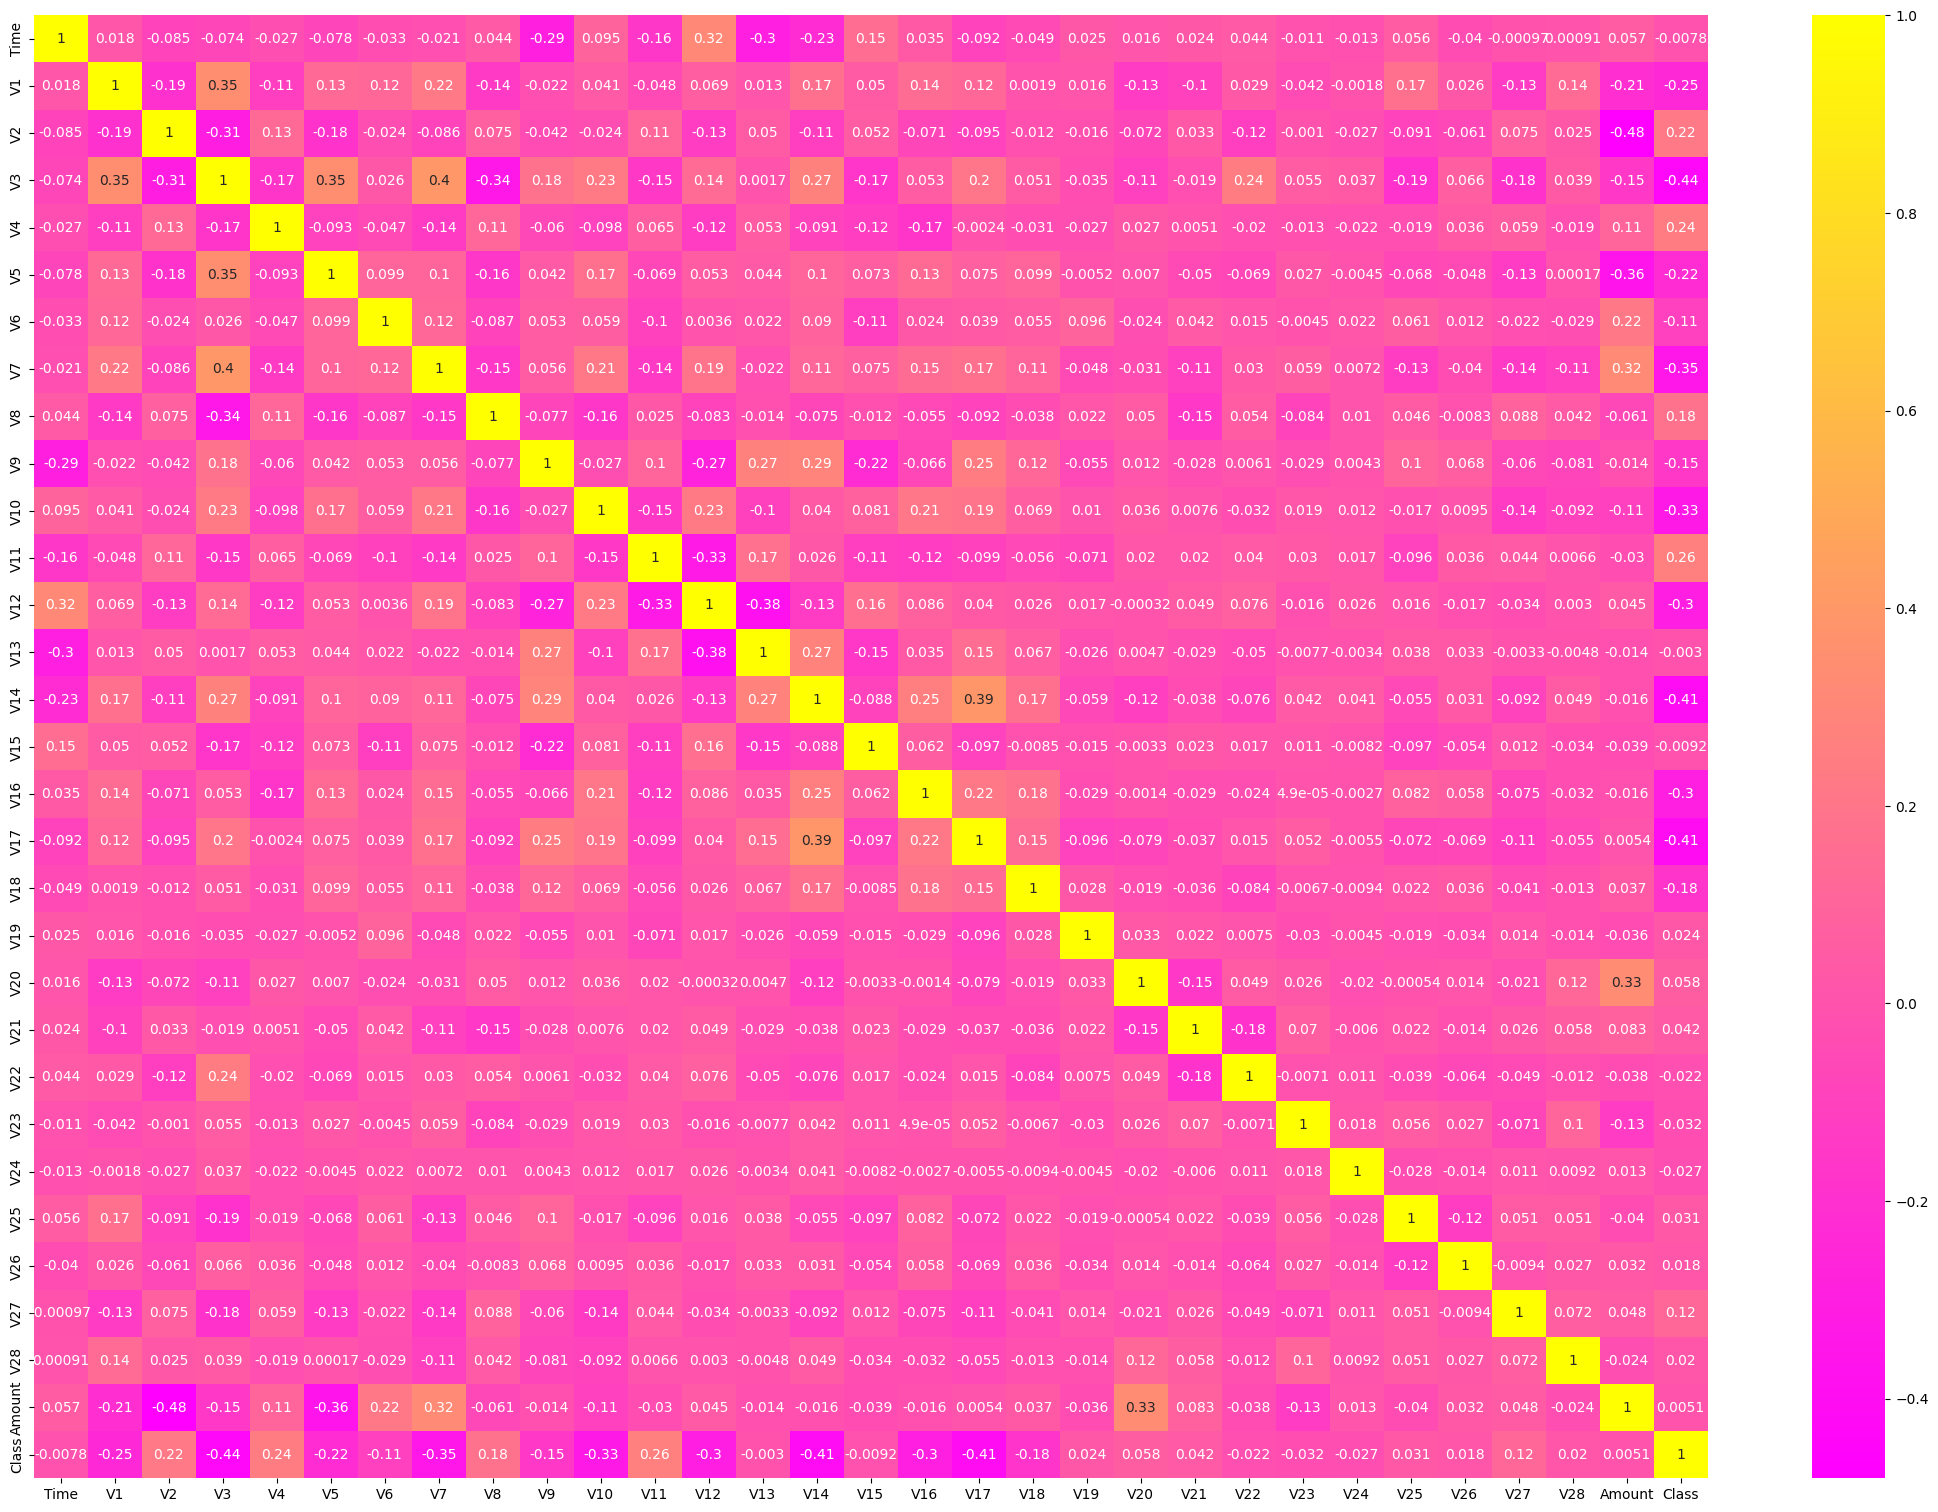

In [18]:
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [21]:
legit = cc[cc.Class == 0]

In [22]:
fraud = cc[cc.Class==1]

In [23]:
legit.Amount.describe()

count    27725.000000
mean        77.232517
std        219.509762
min          0.000000
25%          6.490000
50%         19.950000
75%         69.320000
max       7879.420000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count      93.000000
mean       96.609677
std       259.128010
min         0.000000
25%         1.000000
50%         1.100000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [25]:
cc.groupby('Class').describe()

Time                                                               \
         count          mean           std    min     25%      50%      75%   
Class                                                                         
0.0    27725.0  20440.754518  11873.023524    0.0  9039.0  24689.0  31329.0   
1.0       93.0  18829.451613   9321.493796  406.0  8886.0  18675.0  27163.0   

                     V1            ...       V28             Amount  \
           max    count      mean  ...       75%       max    count   
Class                              ...                                
0.0    34712.0  27725.0 -0.190595  ...  0.076195  4.860769  27725.0   
1.0    34687.0     93.0 -8.165086  ...  0.476920  1.108933     93.0   

                                                                
            mean         std  min   25%    50%    75%      max  
Class                                                           
0.0    77.232517  219.509762  0.0  6.49  19.95  69.32  7879.42  
1.0    96.609677  259.128010  0.0  1.00   1.10  99.99  1809.68  

[2 rows x 240 columns]

In [26]:
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,20440.754518,-0.190595,0.129284,0.765200,0.201632,-0.180681,0.092904,-0.099318,0.014884,0.405538,...,0.041673,-0.037007,-0.125822,-0.040202,0.011510,0.129192,0.022983,0.010650,0.003732,77.232517
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,...,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


In [27]:
normal_sample = legit.sample(n=492)

In [28]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0)

In [29]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6697,8319,-0.424671,0.572668,1.206903,-1.856929,0.407276,-0.534332,0.680425,-0.195243,2.389246,...,-0.123844,0.206307,-0.394025,-0.465199,0.330115,-0.823530,0.144603,0.126277,7.60,0.0
13588,24080,1.152479,0.276667,0.714156,1.207999,-0.047063,0.341624,-0.386725,0.092975,1.173721,...,0.080375,0.556440,-0.142715,-0.339819,0.550959,-0.229012,0.022814,0.005195,5.95,0.0
19681,30466,1.452901,-0.475756,0.155140,-0.575338,-0.718861,-0.603680,-0.435483,-0.207618,-0.554431,...,0.021318,0.213959,-0.165682,-0.058139,0.772633,-0.115557,0.009892,0.003235,2.99,0.0
15130,26478,1.172176,0.201244,0.615102,0.559823,-0.479238,-0.763608,0.029649,-0.113339,-0.330584,...,-0.174895,-0.548762,0.127090,0.549271,0.176477,0.060524,-0.031349,0.015153,17.99,0.0
8195,11048,1.248863,0.044269,0.883953,0.319114,-0.780601,-0.821102,-0.400727,-0.233167,1.653130,...,-0.060795,0.114329,-0.020679,0.430199,0.226053,1.028923,-0.085688,0.006941,14.95,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26802,34256,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,...,0.371773,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,19.02,1.0
27362,34521,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1.0
27627,34634,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,...,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,18.96,1.0
27738,34684,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30,1.0


In [30]:
  new_dataset['Class'].value_counts()

0.0    492
1.0     93
Name: Class, dtype: int64

In [31]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,21197.237805,-0.229459,0.158611,0.699154,0.223541,-0.208135,0.113477,-0.101717,0.040150,0.387131,...,-0.010280,0.006173,-0.100635,-0.066182,0.019326,0.131390,0.001884,0.026197,-0.014488,77.399593
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,...,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


In [32]:
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')
# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)

In [33]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6697,-0.424671,0.572668,1.206903,-1.856929,0.407276,-0.534332,0.680425,-0.195243,2.389246,-2.238228,...,-0.123844,0.206307,-0.394025,-0.465199,0.330115,-0.823530,0.144603,0.126277,7.60,0.0
13588,1.152479,0.276667,0.714156,1.207999,-0.047063,0.341624,-0.386725,0.092975,1.173721,-0.206434,...,0.080375,0.556440,-0.142715,-0.339819,0.550959,-0.229012,0.022814,0.005195,5.95,0.0
19681,1.452901,-0.475756,0.155140,-0.575338,-0.718861,-0.603680,-0.435483,-0.207618,-0.554431,0.498596,...,0.021318,0.213959,-0.165682,-0.058139,0.772633,-0.115557,0.009892,0.003235,2.99,0.0
15130,1.172176,0.201244,0.615102,0.559823,-0.479238,-0.763608,0.029649,-0.113339,-0.330584,0.075902,...,-0.174895,-0.548762,0.127090,0.549271,0.176477,0.060524,-0.031349,0.015153,17.99,0.0
8195,1.248863,0.044269,0.883953,0.319114,-0.780601,-0.821102,-0.400727,-0.233167,1.653130,-0.535895,...,-0.060795,0.114329,-0.020679,0.430199,0.226053,1.028923,-0.085688,0.006941,14.95,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26802,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,-2.133176,...,0.371773,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,19.02,1.0
27362,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,0.644550,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1.0
27627,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,...,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,18.96,1.0
27738,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,-3.717450,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30,1.0


In [34]:
x = new_dataset.drop('Class', axis=1)

In [35]:
y = new_dataset['Class']

In [36]:
x.shape

(585, 29)

In [37]:
y.shape

(585,)

**Splitting the data into training and testing data**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [39]:
cols = list(x.columns.values)

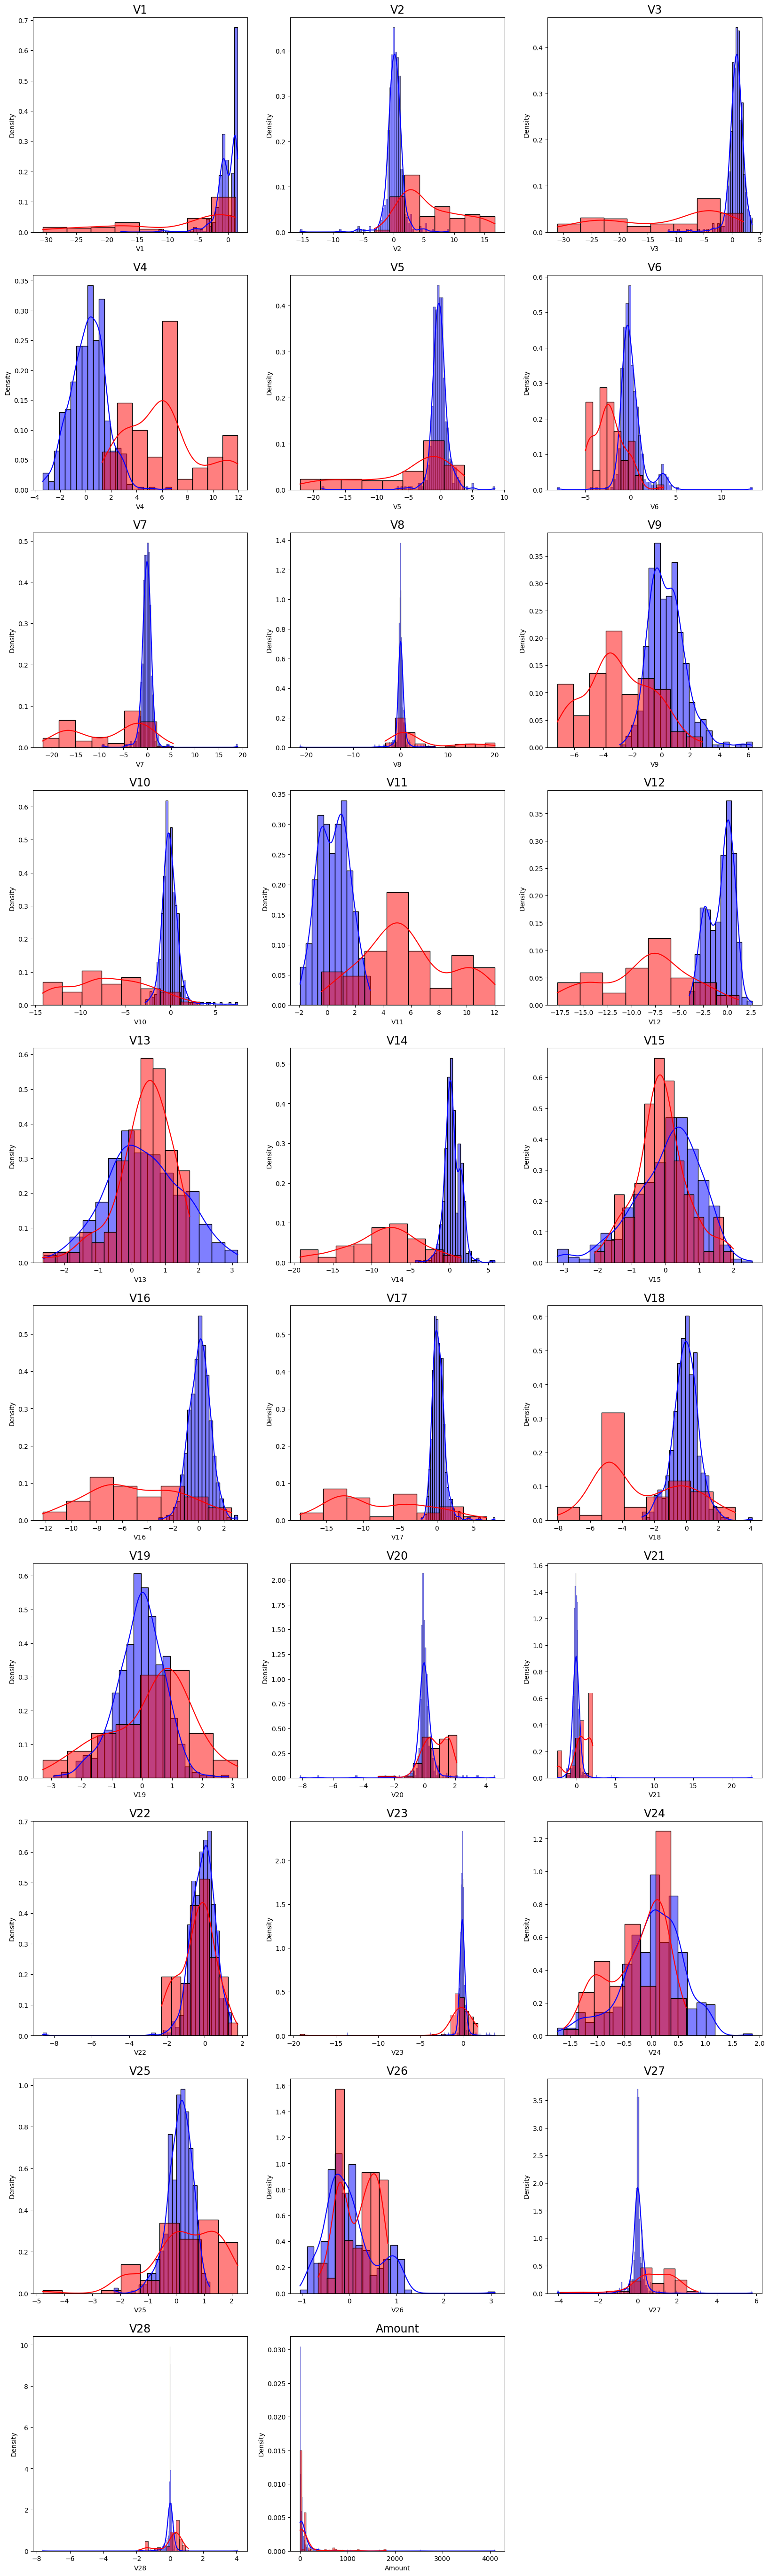

In [42]:
normal_entries = new_dataset.Class==0
fraud_entries = new_dataset.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()

**MODEL TRAINING AND TESTING**

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
pred_test = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()

### **ACCURACY :**

In [45]:
acc_score= round(accuracy_score(y_pred, y_train)*100,2)

In [46]:
print('Accuracy score for training data of our model is :', acc_score)

Accuracy score for training data of our model is : 98.63


In [48]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)

In [49]:
print('the accuracy score of our model is :', acc_score)

the accuracy score of our model is : 97.96


In [50]:
from sklearn import metrics

In [51]:
score = round(model.score(x_test, y_test)*100,2)
print('score of our model is :', score)

score of our model is : 97.96


In [56]:
class_report = classification_report(y_pred, y_test)
print('classification:', class_report)


classification:               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       125
         1.0       0.91      0.95      0.93        22

    accuracy                           0.98       147
   macro avg       0.95      0.97      0.96       147
weighted avg       0.98      0.98      0.98       147



*- ANURAG HALDAR*